In [57]:
import pandas as pd
import numpy as np

# Đọc file gốc
track_credit_df = pd.read_parquet("../data/track_credit.parquet")
tps1 = pd.read_parquet("../data/tps_part1.parquet")
tps2 = pd.read_parquet("../data/tps_part2.parquet")
tps_df = pd.concat([tps1, tps2])
track_credit_df.info()
tps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13264 entries, 0 to 13263
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          13264 non-null  int32         
 1   track_id    13264 non-null  int32         
 2   artist_id   13264 non-null  int32         
 3   role_id     13264 non-null  int32         
 4   created_at  13264 non-null  datetime64[ns]
 5   updated_at  13264 non-null  datetime64[ns]
 6   position    13245 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(4)
memory usage: 518.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18765833 entries, 0 to 18765832
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   track_id      int32         
 1   user_id       int32         
 2   date          object        
 3   listen_count  int32         
 4   created_at    datetime64[ns]
 5   updated_at    datetime64[ns]
dty

In [58]:
# Định dạng lại các kiểu dữ liệu phù hợp
track_credit_df['track_id'] = track_credit_df['track_id'].astype(str)
track_credit_df['created_at'] = pd.to_datetime(track_credit_df['created_at']).dt.strftime('%d/%m/%Y %H:%M:%S')
track_credit_df['updated_at'] = pd.to_datetime(track_credit_df['updated_at']).dt.strftime('%d/%m/%Y %H:%M:%S')

tps_df['track_id'] = tps_df['track_id'].astype(str)
tps_df['date'] = pd.to_datetime(tps_df['date']).dt.strftime('%d/%m/%Y')
tps_df['created_at'] = pd.to_datetime(tps_df['created_at']).dt.strftime('%d/%m/%Y %H:%M:%S')
tps_df['updated_at'] = pd.to_datetime(tps_df['updated_at']).dt.strftime('%d/%m/%Y %H:%M:%S')
tps_df

,track_id,user_id,date,listen_count,created_at,updated_at
0,1,-1,02/12/2020,2,03/12/2020 00:22:14,03/12/2020 00:22:14
1,1,14,02/12/2020,9,03/12/2020 00:20:05,03/12/2020 00:20:05
2,1,14,03/12/2020,13,07/12/2020 03:58:40,07/12/2020 03:58:40
3,4,-1,18/05/2020,1,19/05/2020 15:03:50,19/05/2020 15:03:50
4,4,-1,21/05/2020,1,22/05/2020 04:52:53,23/05/2020 02:40:58
...,...,...,...,...,...,...
18765828,22786,1585730,16/11/2024,1,17/11/2024 07:16:26,17/11/2024 07:16:26
18765829,22786,1790029,16/11/2024,1,17/11/2024 07:16:30,17/11/2024 07:16:30
18765830,22786,1883197,16/11/2024,2,17/11/2024 07:16:30,17/11/2024 07:16:30
18765831,22786,1990181,16/11/2024,1,17/11/2024 07:16:33,17/11/2024 07:16:33


In [4]:
#Kiểm tra giá trị còn thiếu theo cột cho track_credit_df
print(track_credit_df.isna().sum())

#Kiểm tra giá trị trùng lặp theo dòng cho track_credit_df
track_credit_df.duplicated().sum()

id             0
track_id       0
artist_id      0
role_id        0
created_at     0
updated_at     0
position      19
dtype: int64


0

In [59]:
#loại bỏ các giá trị còn thiếu (chỉ chiếm 0.14% tổng số dòng) theo cột cho track_credit_df
track_credit_df.dropna(inplace=True)

#Kiểm tra giá trị còn thiếu theo cột cho tps_df
print(tps_df.isna().sum())

#Kiểm tra giá trị trùng lặp theo dòng cho tps_df
tps_df.duplicated().sum()

track_id        0
user_id         0
date            0
listen_count    0
created_at      0
updated_at      0
dtype: int64


0

In [21]:
print(track_credit_df.isna().sum())

id            0
track_id      0
artist_id     0
role_id       0
created_at    0
updated_at    0
position      0
dtype: int64


In [6]:
tps_df.describe()

,user_id,listen_count
count,1.876583e+07,1.876583e+07
mean,7.212808e+05,1.213218e+00
std,5.381666e+05,1.404523e+01
min,-2.000000e+00,-5.000000e+03
25%,2.580430e+05,1.000000e+00
50%,6.036130e+05,1.000000e+00
75%,1.116863e+06,1.000000e+00
max,1.992047e+06,2.000000e+04


In [49]:
user_negative = tps_df[tps_df['user_id'] < 0]['user_id'].count()
user_total = tps_df['user_id'].count()

print(f"Số mã người dùng âm là: {user_negative:,} chiếm {user_negative / user_total:.2%} dữ liệu người dùng")

listen_negative = tps_df[tps_df['listen_count'] < 0]['listen_count'].count()
listen_zero = tps_df[tps_df['listen_count'] == 0]['listen_count'].count()
listen_total = tps_df['listen_count'].count()

print(f"Số lần nghe âm là: {listen_negative:,} chiếm {listen_negative / listen_total:.2%} dữ liệu nghe nhạc")
print(f"Số lần nghe = 0 là: {listen_zero:,} chiếm {listen_zero / listen_total:.2%} dữ liệu nghe nhạc")

Số mã người dùng âm là: 99,400 chiếm 0.55% dữ liệu người dùng
Số lần nghe âm là: 0 chiếm 0.00% dữ liệu nghe nhạc
Số lần nghe = 0 là: 0 chiếm 0.00% dữ liệu nghe nhạc


listen_count là số lần nghe nhạc, nên giá trị <= 0 (0 hoặc âm) không hợp lý trong ngữ cảnh hành vi nghe nhạc thực tế:

- *listen_count < 0 (âm)*: có thể  là lỗi kỹ thuật (ví dụ: lỗi hệ thống hoặc API tracking: Nếu hệ thống ghi nhận số lần nghe nhưng có sự cố, có thể dẫn đến giá trị < 0.), không có ý nghĩa phân tích, __loại bỏ để tối ưu dữ liệu__.

Với **0.09% (âm) và 2.8% (bằng 0)**, đây là một phần dữ liệu đáng kể hơn. Đặc biệt, 2.8% cho listen_count = 0 là con số không thể bỏ qua ngay lập tức.

- *listen_count = 0*: Có thể là trường hợp người dùng mở bài nhạc nhưng không nghe (ví dụ: giao diện tải chậm, lỗi kết nối, hoặc thoát ngay lập tức), có thể ứng dụng vào phân tích để tìm hiểu lý do tỷ lệ bounce rate cao khi người dùng vào nhưng không nghe để đánh giá trải nghiệm người dùng trên ứng dụng nghe nhạc, nên __giữ lại để tận dụng insight về hành vi người dùng__, phản ánh trải nghiệm người dùng thực tế, hữu ích để cải thiện chất lượng dịch vụ.


In [60]:
#giữ lại giá trị =0 cho lượt nghe
non_listened_df = tps_df[tps_df['listen_count'] == 0]
#loại bỏ giá trị âm cho lượt nghe
tps_df = tps_df[tps_df['listen_count'] > 0]
#khảo sát dữ liệu có lượt nghe lớn
tps_df[tps_df['listen_count']>=20000]

,track_id,user_id,date,listen_count,created_at,updated_at
11227364,6114,-2,06/07/2022,20000,08/07/2022 08:22:51,08/07/2022 08:25:09
15173669,10564,-2,16/04/2023,20000,17/04/2023 09:47:28,17/04/2023 09:47:28


In [40]:
tps_df[tps_df['user_id'] <= 0].sort_values(by=['listen_count'], ascending=False).head(50)

,track_id,user_id,date,listen_count,created_at,updated_at
15173669,10564,-2,16/04/2023,20000,17/04/2023 09:47:28,17/04/2023 09:47:28
11227364,6114,-2,06/07/2022,20000,08/07/2022 08:22:51,08/07/2022 08:25:09
7101840,2654,-2,16/04/2023,18000,17/04/2023 09:47:28,17/04/2023 09:47:28
12161021,6996,-2,31/08/2022,17000,02/09/2022 07:35:16,02/09/2022 15:20:36
12170356,6997,-2,31/08/2022,17000,02/09/2022 07:35:50,02/09/2022 15:20:36
13470174,8007,-2,19/11/2022,14000,22/11/2022 02:28:52,22/11/2022 02:28:52
14412839,9246,-2,29/01/2023,14000,30/01/2023 08:24:37,30/01/2023 08:24:37
13591889,8155,-2,20/11/2022,14000,22/11/2022 02:26:07,22/11/2022 02:26:07
10423083,5413,-2,08/05/2022,13000,09/05/2022 06:55:35,09/05/2022 06:55:35
10957859,5971,-2,25/06/2022,13000,27/06/2022 16:38:42,27/06/2022 16:44:18


In [50]:
print('các mã người dùng âm: ',tps_df[tps_df['user_id'] < 0]['user_id'].unique())
tps_df[tps_df['user_id'] <0]

các mã người dùng âm:  [-1 -2]


,track_id,user_id,date,listen_count,created_at,updated_at
0,1,-1,02/12/2020,2,03/12/2020 00:22:14,03/12/2020 00:22:14
3,4,-1,18/05/2020,1,19/05/2020 15:03:50,19/05/2020 15:03:50
4,4,-1,21/05/2020,1,22/05/2020 04:52:53,23/05/2020 02:40:58
5,4,-1,22/05/2020,2,23/05/2020 02:40:42,27/05/2020 01:53:43
6,4,-1,27/05/2020,1,28/05/2020 07:19:38,28/05/2020 08:06:45
...,...,...,...,...,...,...
17936682,18975,-2,19/05/2024,680,20/05/2024 09:15:01,20/05/2024 09:23:48
18475479,20819,-2,10/09/2024,2108,13/09/2024 04:42:00,13/09/2024 04:42:00
18512064,21016,-2,10/09/2024,494,13/09/2024 04:42:56,13/09/2024 04:42:56
18676970,22037,-2,19/10/2024,784,22/10/2024 12:53:51,22/10/2024 12:53:51


*user_id = -2* có số lượng nghe rất lớn có thể là một bot hệ thống thực hiện các thử nghiệm, hay một loại tài khoản dùng để thu thập hoặc kiểm tra dữ liệu.

Trong các hệ thống dữ liệu, user_id thường là một số dương duy nhất để định danh người dùng thực tế. Giá trị user_id < 0 thường không hợp lệ trong ngữ cảnh này:
*user_id < 0 (âm)*: Có thể là lỗi dữ liệu (ví dụ: sai sót trong nhập liệu, đồng bộ hóa, hoặc mã hóa không đúng). Tỉ lệ này rất nhỏ (tổng cộng 0.55% cho user_id < 0), cho thấy đây có thể là lỗi ghi nhận hoặc dữ liệu từ tài khoản không phải người dùng thực tế.

Nếu hệ thống dùng user_id <= 0 để chạy thử nghiệm (ví dụ: bot tự động nghe nhạc để kiểm tra giao diện), dữ liệu này có thể hữu ích để phân tích hiệu suất hệ thống hoặc phát hiện lỗi, các giá trị này không phản ánh hành vi người dùng thực và **nên được loại bỏ**. Đây là tỉ lệ rất nhỏ, nên việc loại bỏ sẽ không gây mất mát đáng kể thông tin về hành vi người dùng thực tế.


lower_bound:  1.0
upper_bound:  1.0


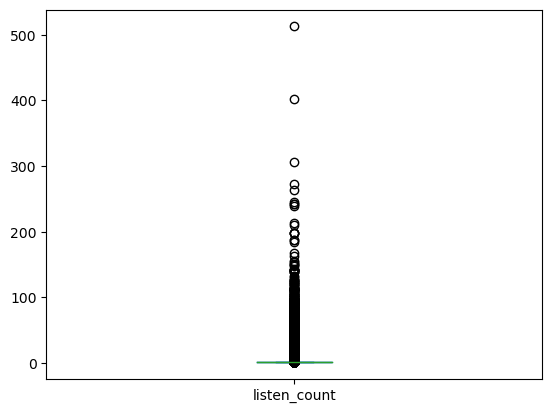

In [61]:
#loại bỏ giá trị âm cho mã người dùng
tps_df = tps_df[tps_df['user_id']>=0]
tps_df['listen_count'].plot.box()

# Lọc các outlier theo công thức tính IQR
Q1 = tps_df['listen_count'].quantile(0.25)
Q3 = tps_df['listen_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound: ",lower_bound)
print("upper_bound: ",upper_bound)

Nếu lọc outlier theo công thức Tính IQR thì khi lower_bound = upper_bound = 1, thì sau khi loại bỏ số lượt chỉ còn lại là = 1, dữ liệu không còn ý nghĩa phân tích về hành vi bất thường của một nhóm khách hàng đặc biệt.

In [62]:
# Lọc các outlier theo công thức tính 99th percentile
lower_threshold = tps_df['listen_count'].quantile(0.01)
upper_threshold = tps_df['listen_count'].quantile(0.99)

outlier_df = tps_df[(tps_df['listen_count'] < lower_threshold) | (tps_df['listen_count'] > upper_threshold)]
threshold_df = tps_df[(tps_df['listen_count'] >= lower_threshold) & (tps_df['listen_count'] <= upper_threshold)]

outlier_ratio = round(len(outlier_df)/len(tps_df)*100,2)
print("{} giá trị lớn hơn phân vị 99% IQR chiếm {}% trong tổng {} giá trị".format(len(outlier_df), outlier_ratio, len(tps_df)))

132826 giá trị lớn hơn phân vị 99% IQR chiếm 0.73% trong tổng 18125050 giá trị


In [53]:
threshold_df

,track_id,user_id,date,listen_count,created_at,updated_at
96,4,3,22/05/2020,1,23/05/2020 02:40:42,27/05/2020 01:53:43
97,4,3,12/07/2021,3,02/09/2021 03:10:57,02/09/2021 03:10:57
99,4,3,07/08/2021,3,03/09/2021 01:58:14,03/09/2021 01:58:14
100,4,3,08/06/2023,1,13/06/2023 07:56:51,13/06/2023 07:56:51
101,4,4,24/05/2020,1,27/05/2020 01:34:59,27/05/2020 01:53:43
...,...,...,...,...,...,...
18765828,22786,1585730,16/11/2024,1,17/11/2024 07:16:26,17/11/2024 07:16:26
18765829,22786,1790029,16/11/2024,1,17/11/2024 07:16:30,17/11/2024 07:16:30
18765830,22786,1883197,16/11/2024,2,17/11/2024 07:16:30,17/11/2024 07:16:30
18765831,22786,1990181,16/11/2024,1,17/11/2024 07:16:33,17/11/2024 07:16:33


In [67]:
track_credit_df.to_parquet("../data/track_credit_cleaned.parquet", engine="pyarrow", index=False)
tps_df.to_parquet("../data/tps_df_cleaned.parquet", engine="pyarrow", index=False)